# Welcome to BASS!

Version: Single Wave- Interactive Notebook.

    BASS: Biomedical Analysis Software Suite for event detection and signal processing.
    Copyright (C) 2015  Abigail Dobyns

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <http://www.gnu.org/licenses/>

## Initalize

Run the following code block to intialize the program. This notebook and bass.py file **must** be in the same folder.

In [1]:
from BASS import *
from bass_functions import *

BASS ready!


# Begin User Input

For help, check out the wiki: [Protocol](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol)

Or the video tutorial: Coming Soon!

## Load Data File
Use the following block to change your settings. You **must** use this block.

Here are some helpful information about the loading settings:

**Full File Path to Folder containing file:**
Designate the path to your file to load. It can also be the relative path to the folder where this notebook is stored. This does not include the file itself.

    Mac OSX Example: '/Users/MYNAME/Documents/bass'
    Microsoft Example: 'C:\\Users\MYNAME\Documents\bass'
    

**File name:**
This is the name of your data file. It should include the file type. This file should NOT have a header and the first column must be time in seconds. Note: This file name will also appear as part of the output files names.

    'rat34_ECG.txt' 

**Full File Path for data output:** Designate the location of the folder where you would like the folder containing your results to go. If the folder does not exist, then it will be created. A plots folder, called 'plots' will be created inside this folder for you if it does not already exist. 

    Mac OSX Example: '/Users/MYNAME/Documents/output'
    Microsoft Example: 'C:\\Users\MYNAME\Documents\output' 

[Loading a file](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#load)

In [2]:
Data, Settings, Results = load_interact()

Full File Path to Folder containing file: /home/jkoch/Documents/Python/bass
File Name: rat34_ECG.txt
Full File Path to Output Folder: /home/jkoch/Documents/Python/bass/output
Made plots folder
Data Loaded
Rounded Sampling Rate (s/frame): 0.00025
rat34_ECG.txt is 606.94975 seconds long.


### Graph Data (Optional)

Use this block to check any slicing you need to do to cut out problematic data from the head or tail. You can click on any point in the wave to get the (x,y) location of that point. Clipping inside this notebook is not supported at this time.

[Graph Raw Data](https://github.com/drcgw/bass/wiki/Tutorial#graph-data)

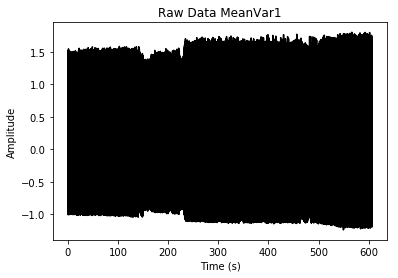

In [3]:
plot_rawdata(Data)

### Power Spectral Density (Optional)

Use the settings code block to set your frequency bands to calculate area under the curve. This block is not required. band output is always in raw power, even if the graph scale is dB/Hz.

[Power Spectral Density: Signal](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#power-spectral-density-optional)

In [4]:
#optional
Settings['PSD-Signal'] = Series(index = ['ULF', 'VLF', 'LF','HF','dx'])

#Set PSD ranges for power in band
Settings['PSD-Signal']['ULF'] = 25 #max of the range of the ultra low freq band. range is 0:ulf
Settings['PSD-Signal']['VLF'] = 75 #max of the range of the very low freq band. range is ulf:vlf
Settings['PSD-Signal']['LF'] = 150 #max of the range of the low freq band. range is vlf:lf
Settings['PSD-Signal']['HF'] = 300 #max of the range of the high freq band. range is lf:hf. hf can be no more than (hz/2) where hz is the sampling frequency
Settings['PSD-Signal']['dx'] = 2 #segmentation for integration of the area under the curve. 

Use the block below to generate the PSD graph and power in bands results (if selected). scale toggles which units to use for the graph:
    
    raw = s^2/Hz
    db = dB/Hz = 10*log10(s^2/Hz)
    
Graph and table are automatically saved in the `PSD-Signal` subfolder.

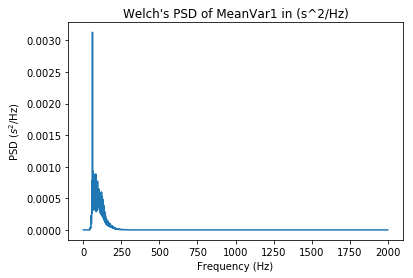

,MeanVar1
ULF,1.3481e-07
VLF,0.0131129
LF,0.0284615
HF,0.00448827
LF/HF,6.34131
Scale,s^2/Hz


In [5]:
scale = 'raw' #raw or db
Results = psd_signal(version = 'original', key = 'MeanVar1', scale = scale, 
                     Data = Data, Settings = Settings, Results = Results)
Results['PSD-Signal']

### Spectrogram (Optional)

Use the block below to get the spectrogram of the signal. The frequency (y-axis) scales automatically to only show 'active' frequencies. This can take some time to run. 

    version = 'original'
    key = 'Mean1'

After transformation is run, you can call version = 'trans'. This graph is not automatically saved.

[Spectrogram](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#spectrogram)

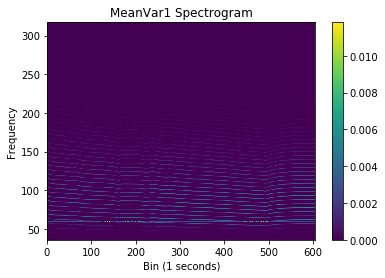

In [6]:
version = 'original'
key = 'MeanVar1'
spectogram(version, key, Data, Settings, Results)

# Transforming Data

Must be done for each new uploaded data file.

**WARNING:** If you do not load a settings file OR enter your own settings, the analysis will not run. There are no defaults. This section is not optional.

[Transforming Data](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#transforming-data)

## Load settings from a file

Must be a previously outputed BASS settings file, although the name can be changed. Expected format is '.csv'. Enter the full file path and name.

    Mac OSX Example: '/Users/MYNAME/Documents/rat34_Settings.csv'
    Microsoft Example: 'C:\\Users\MYNAME\Documents\rat34_Settings.csv'
    
See above instructions for how to load your data file.

**Warning!!** You must load a settings file or specify your settings below. There are no defaults

[Loading Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#load-settings-from-a-file)

In [7]:
Settings = load_settings_interact(Settings)
Settings_display = display_settings(Settings)
Settings_display

Full File path and file for the settings file: /home/jkoch/Documents/Python/bass/rat34_Settings.csv


IndexError: index 0 is out of bounds for axis 0 with size 0

## Enter your settings for data transformation

**WARNING:** If you do not load a settings file OR enter your own settings, the analysis will not run. There are no defaults. This section is not optional.

Enter the parameters of the functions you would like to use to transform your data. 
If you do not want to use a function, enter 'none'

For more help on settings:

[Transformation Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#enter-your-settings-for-data-transformation)

In [ ]:
Settings = user_input_trans(Settings)

##Run data transformation

**This Block Is Not Optional**

[Transform](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#run-data-transformation)

In [ ]:
Data, Settings = transform_wrapper(Data, Settings)
graph_ts(Data, Settings, Results)

## Set Baseline for Thresholding

**WARNING** If you do not load a settings file OR enter your own settings, the analysis will not run. There are no defaults. This section is not optional.

[Baseline](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#set-baseline-for-thresholding)

### Choose either linear or rolling baseline.

[Linear](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#linear) - takes a user specified time segment as a good representation of baseline. If the superstructure is linear but has a slope, use linear fit in the transformation to still use linear. Linear automatically shifts your data by the ammount of your baseline normalize the baseline to zero.

[Rolling](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#rolling) - rolling mean of the data is generated based on a moving window. User provides the window size in miliseconds. there is no shift in the data with this method.

[Static](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#static) - Skips baseline generatoin and allows you to choose an arbitrary y value for threshold. No Shift in the data.

In [ ]:
Settings = user_input_base(Settings)

### Run baseline

[Generate Baseline](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#run-baseline)

In [ ]:
Data, Settings, Results = baseline_wrapper(Data, Settings, Results)
graph_ts(Data, Settings, Results)

## Display Settings (Optional)

Optional block. Run this at any time to check what your settings are. If it does not appear, it has not been set yet.

[Display Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#display-settings)

In [ ]:
Settings_display = display_settings(Settings)
Settings_display

# Event Detection

#Peaks

Peaks are local maxima, defined by local minima on either side of them. [Click here for more information about this algorithm](http://billauer.co.il/peakdet.html)

## Peak Detection Settings

Run the Following Block of code to enter or change peak detection settings. If you have loaded settings from a previous file, you do not need to run this block.

[Peak Detection Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#peak-detection-settings)

In [ ]:
Settings = event_peakdet_settings(Data, Settings)

### Run Event Peak Detection

Run block of code below to run peak deteaction. This block will print a summary table of the all available peak measurments.

[Peak Detection](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#run-event-peak-detection)

In [ ]:
Results = event_peakdet_wrapper(Data, Settings, Results)
Results['Peaks-Master'].groupby(level=0).describe()

### Plot Events (Optional)

Use the block below to visualize event detection. Peaks are blue triangles. Valleys are pink triangles.

[Visualize Events](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#plot-events)

In [ ]:
graph_ts(Data, Settings, Results)

##Bursts
Bursts are the boundaries of events defined by their amplitudes, which are greater than the set threshold

### Enter Burst Settings

Run the Following Block of code to enter or change burst detection settings. If you have loaded settings from a previous file, you do not need to run this block.

[Burst Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#enter-burst-settings)

In [ ]:
Settings = event_burstdet_settings(Data, Settings, Results)

### Run Event Burst Detection

Run block of code below to run burst deteaction. 

This block will print a summary table of all available burst measurements.

[Burst Detection](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#run-event-burst-detection)

In [ ]:
Results = event_burstdet_wrapper(Data, Settings, Results)
Results['Bursts-Master'].groupby(level=0).describe()

### Plot Events (Optional)

Call a column of data by its key (column name). Default name for one column of data is 'Mean1'

[Visualize Bursts](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#plot-events-optional)

In [ ]:
key = 'Mean1'
graph_ts(Data, Settings, Results, key)

## Save all files and settings

[Save Event Tables and Settings](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#save-all-files-and-settings)

In [ ]:
Save_Results(Data, Settings, Results)

# Event Analysis

Now that events are detected, you can analyze them using any of the optional blocks below. 

[More information about how to use this](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#event-analysis)

## Display Tables

### Display Summary Results for Peaks

In [ ]:
#grouped summary for peaks
Results['Peaks-Master'].groupby(level=0).describe()

### Display Summary Results for Bursts

In [ ]:
#grouped summary for bursts
Results['Bursts-Master'].groupby(level=0).describe()

## Results Plots

### Poincare Plots

Create a Poincare Plot of your favorite varible. Choose an event type (Peaks or Bursts), measurement type. Calling meas = 'All' is supported.

Plots and tables are saved automatically

Example:

    event_type = 'Bursts'
    meas = 'Burst Duration'

[More on Poincare Plots](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#poincare-plots)

####Batch Poincare

[Batch Poincare](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#batch-poincare)

In [ ]:
#Batch
event_type = 'Peaks'
meas = 'all'
Results = poincare_batch(event_type, meas, Data, Settings, Results)
pd.concat({'SD1':Results['Poincare SD1'],'SD2':Results['Poincare SD2']})

####Quick Poincare Plot

Quickly call one poincare plot for display. Plot and Table are not saved automatically. Choose an event type (Peaks or Bursts), measurement type, and key. Calling meas = 'All' is not supported.

[Quick Poincare](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#quick-poincare-plots)

In [ ]:
#quick
event_type = 'Bursts'
meas = 'Burst Duration'
key = 'Mean1'
poincare_plot(Results[event_type][key][meas])

## Line Plots
Create line plots of the raw data as well as the data analysis. 

Plots are saved by clicking the save button in the pop-up window with your graph.

    key = 'Mean1'
    start =100 
    end= 101

[Results Line Plot](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#line-plots)

In [ ]:
key = 'Mean1'
start =100 #start time in seconds
end= 101 #end time in seconds
results_timeseries_plot(key, start, end, Data, Settings, Results)

### Autocorrelation Plot
Display the Autocorrelation plot of your transformed data.

Choose the start and end time in seconds. May be slow

    key = 'Mean1'
    start = 0 
    end = 10

[Autocorrelation Plot](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#autocorrelation)

In [ ]:
#autocorrelation
key = 'Mean1'
start = 0 #seconds, where you want the slice to begin
end = 10 #seconds, where you want the slice to end.
autocorrelation_plot(Data['trans'][key][start:end])
plt.show()

### Frequency Plot
Use this block to plot changes of any measurement over time. Does not support 'all'. Example:

    event_type = 'Peaks'
    meas = 'Intervals'
    key = 'Mean1'

[Frequency Plot](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#frequency-plot)

In [ ]:
event_type = 'Peaks'
meas = 'Intervals'
key = 'Mean1' #'Mean1' default for single wave
frequency_plot(event_type, meas, key, Data, Settings, Results)

## Power Spectral Density
The following blocks allows you to asses the power of event measuments in the frequency domain. While you can call this block on any event measurement, it is intended to be used on interval data (or at least data with units in seconds). Reccomended:

    event_type = 'Bursts'
    meas = 'Total Cycle Time'
    key = 'Mean1'
    scale = 'raw'
    
    event_type = 'Peaks'
    meas = 'Intervals'
    key = 'Mean1'
    scale = 'raw'

Because this data is in the frequency domain, we must interpolate it in order to perform a FFT on it. Does not support 'all'.

[Power Spectral Density: Events](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#power-spectral-density)

### Settings

Use the code block below to specify your settings for event measurment PSD.

In [ ]:
Settings['PSD-Event'] = Series(index = ['Hz','ULF', 'VLF', 'LF','HF','dx'])
#Set PSD ranges for power in band

Settings['PSD-Event']['hz'] = 4.0 #freqency that the interpolation and PSD are performed with.
Settings['PSD-Event']['ULF'] = 0.03 #max of the range of the ultra low freq band. range is 0:ulf
Settings['PSD-Event']['VLF'] = 0.05 #max of the range of the very low freq band. range is ulf:vlf
Settings['PSD-Event']['LF'] = 0.15 #max of the range of the low freq band. range is vlf:lf
Settings['PSD-Event']['HF'] = 0.4 #max of the range of the high freq band. range is lf:hf. hf can be no more than (hz/2)
Settings['PSD-Event']['dx'] = 10 #segmentation for the area under the curve. 

### Event PSD

Use block below to return the PSD plot, as well as the power in the bands defined by the settings above.

In [ ]:
event_type = 'Bursts'
meas = 'Total Cycle Time'
key = 'Mean1'
scale = 'raw'
Results = psd_event(event_type, meas, key, scale, Data, Settings, Results)
Results['PSD-Event'][key]

## Analyze Events by Measurement
Generates a line plot with error bars for a given event measurement. X axis is the names of each time series. Display Only. Intended for more than one column of data. This is not a box and whiskers plot.

    event_type = 'peaks'
    meas = 'Peaks Amplitude'
    
[Analyze Events by Measurement](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#analyze-events-by-measurement)

In [ ]:
#Get average plots, display only
event_type = 'peaks'
meas = 'Peaks Amplitude'
average_measurement_plot(event_type, meas,Results)

## Moving/Sliding Averages, Standard Deviation, and Count
Generates the moving **mean**, **standard deviation**, and **count** for a given measurement across all columns of the Data in the form of a DataFrame (displayed as a table).
Saves out the dataframes of these three results automatically with the window size in the name as a .csv.
If **meas == 'All'**, then the function will loop and produce these tables for all measurements.

    event_type = 'Peaks'
    meas = 'all'
    window = 30
    
[Moving Stats](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#analyze-events-by-measurement)

In [ ]:
#Moving Stats
event_type = 'Peaks'
meas = 'all'
window = 30 #seconds
Results = moving_statistics(event_type, meas, window, Data, Settings, Results)

# Histogram Entropy
Calculates the histogram entropy of a measurement for each column of data. Also saves the histogram of each. If meas is set to 'all', then all available measurements from the event_type chosen will be calculated iteratevely. 

If all of the samples fall in one bin regardless of the bin size, it means we have the most predictable sitution and the entropy is 0. If we have uniformly dist function, the max entropy will be 1

    event_type = 'Bursts'
    meas = 'all'

[Histogram Entropy](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#histentropy)

In [ ]:
#Histogram Entropy
event_type = 'Bursts'
meas = 'all'
Results = histent_wrapper(event_type, meas, Data, Settings, Results)
Results['Histogram Entropy']

# STOP HERE

You can run another file be going back the the **Begin User Input** section and chose another file path.

[What Should I do now?](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#stop-here)

# Advanced user options

## Approximate entropy
this only runs if you have pyeeg.py in the same folder as this notebook and bass.py. **WARNING: THIS FUNCTION RUNS SLOWLY**

run the below code to get the approximate entropy of any measurement or raw signal. Returns the entropy of the entire results array (no windowing). I am using the following M and R values:

    M = 2  
    R = 0.2*std(measurement)
    
these values can be modified in the source code. alternatively, you can call ap_entropy directly. supports 'all'

**Interpretation**: A time series containing many repetitive patterns has a relatively small ApEn; a less predictable process has a higher ApEn.

[Approximate Entropy in BASS](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#approximate-entropy)

[Aproximate Entropy Source](http://pyeeg.sourceforge.net/)

### Events

In [ ]:
#Approximate Entropy
event_type = 'Peaks'
meas = 'all'
Results = ap_entropy_wrapper(event_type, meas, Data, Settings, Results)
Results['Approximate Entropy']

### Time Series

In [ ]:
#Approximate Entropy on raw signal
#takes a VERY long time
from pyeeg import ap_entropy

version = 'original' #original, trans, shift, or rolling
key = 'Mean1' #Mean1 default key for one time series
start = 0 #seconds, where you want the slice to begin
end = 1 #seconds, where you want the slice to end. The absolute end is -1

ap_entropy(Data[version][key][start:end].tolist(), 2, (0.2*np.std(Data[version][key][start:end])))

### Sample Entropy
this only runs if you have pyeeg.py in the same folder as this notebook and bass.py. **WARNING: THIS FUNCTION RUNS SLOWLY**

run the below code to get the sample entropy of any measurement. Returns the entropy of the entire results array (no windowing). I am using the following M and R values:

    M = 2  
    R = 0.2*std(measurement)
    
these values can be modified in the source code. alternatively, you can call samp_entropy directly. 
Supports 'all'

[Sample Entropy in BASS](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#sample-entropy)

[Sample Entropy Source](http://pyeeg.sourceforge.net/)

### Events

In [ ]:
#Sample Entropy
event_type = 'Bursts'
meas = 'all'
Results = samp_entropy_wrapper(event_type, meas, Data, Settings, Results)
Results['Sample Entropy']

### Time Series

In [ ]:
#on raw signal
#takes a VERY long time
version = 'original' #original, trans, shift, or rolling
key = 'Mean1' #Mean1 default key for one time series
start = 0 #seconds, where you want the slice to begin
end = 1 #seconds, where you want the slice to end. The absolute end is -1

samp_entropy(Data[version][key][start:end].tolist(), 2, (0.2*np.std(Data[version][key][start:end])))

# Blank Code block

you're still here, reading? you must be a dedicated super user!

If that is the case, then you must know how to code in Python. Use this space to get crazy with your own advanced analysis and stuff.

[Blank Code Block](https://github.com/drcgw/bass/wiki/Single-Wave-Interactive-Protocol#blank-code-block)